## Predicting car prices with Python

in this project, I'm using an open dataset from Kaggle to build a linear regression model that predicts car prices.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("CarData/car data.csv")

**Checking the head of dataset, info() and describe() methods.**

In [109]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3350.0,5590.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4750.0,9540.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7250.0,9850.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2850.0,4150.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,4600.0,6870.0,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9250.0,9830.0,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6750.0,8120.0,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6500.0,8610.0,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8750.0,8890.0,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7450.0,8920.0,42367,Diesel,Dealer,Manual,0


In [51]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Cleaning the data and dropping the null values

<AxesSubplot:>

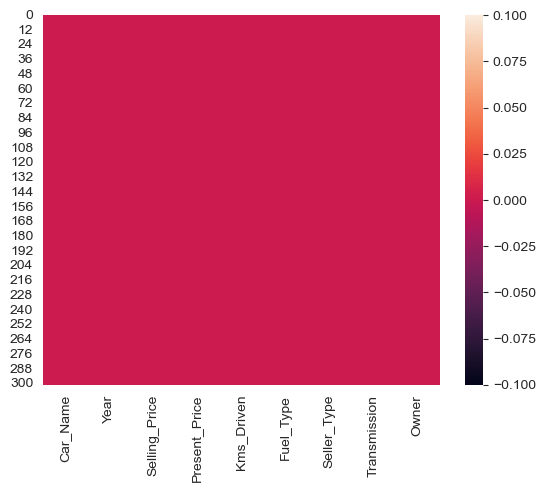

In [53]:
sns.heatmap(df.isnull())

## Exploratory Data Analysis

**Let's explore the data!**

___
**create a jointplot to compare the year and selling_price columns.**

In [107]:
df['Selling_Price'] = df['Selling_Price'] *.1

In [108]:
df['Present_Price'] = df['Present_Price'] *.1

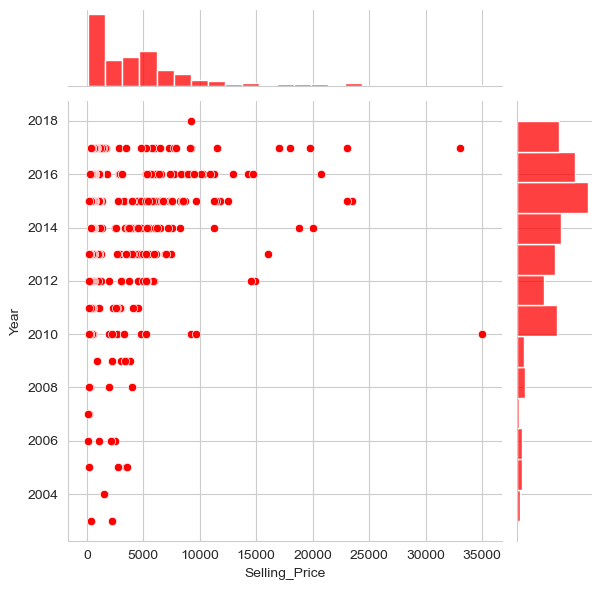

In [110]:
sns.set_style('whitegrid')

sns.jointplot(x='Selling_Price' ,y='Year', data=df, color='red')


** create a jointplot to compare the mileage and year **

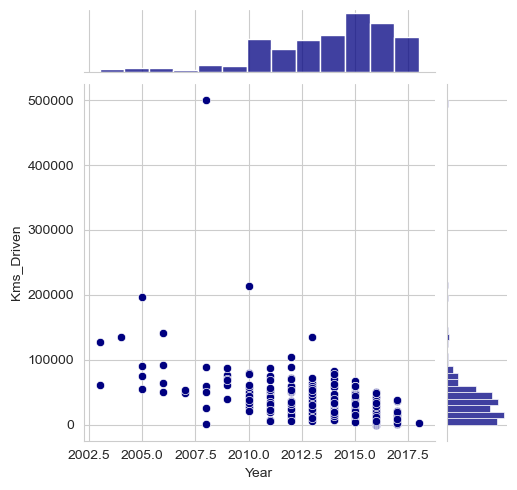

In [123]:
sns.set_style('whitegrid')

sns.jointplot(x='Year' ,y='Kms_Driven', data=df, color='navy', height=5)

**2D hex bin plot comparing selling price and seats.**

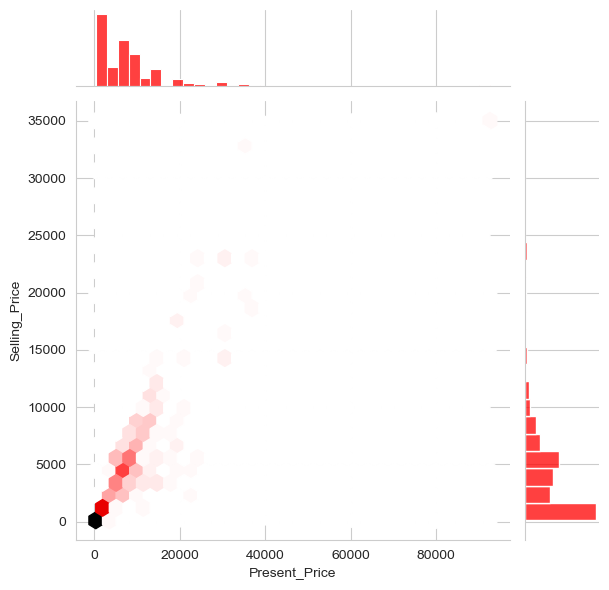

In [124]:
sns.set_style('whitegrid')

sns.jointplot(x='Present_Price' ,y='Selling_Price', data=df, color='red', kind='hex')

**Let's explore these types of relationships across the entire data set.  **

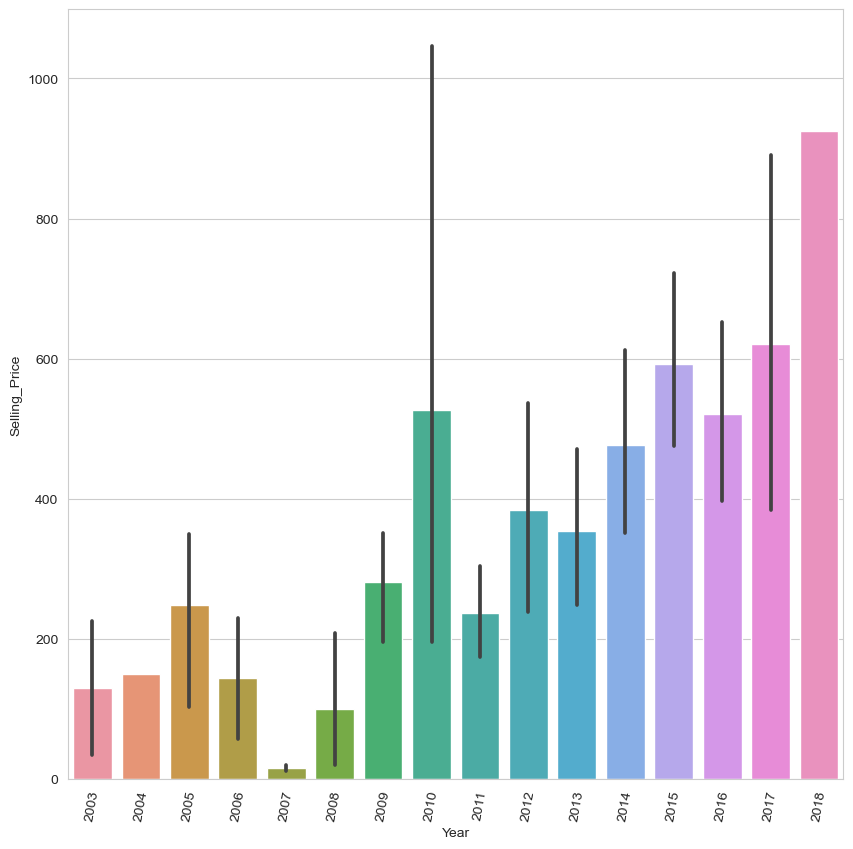

In [60]:
plt.figure(figsize = (10,10))
plot = sns.barplot(y='Selling_Price', x='Year', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()


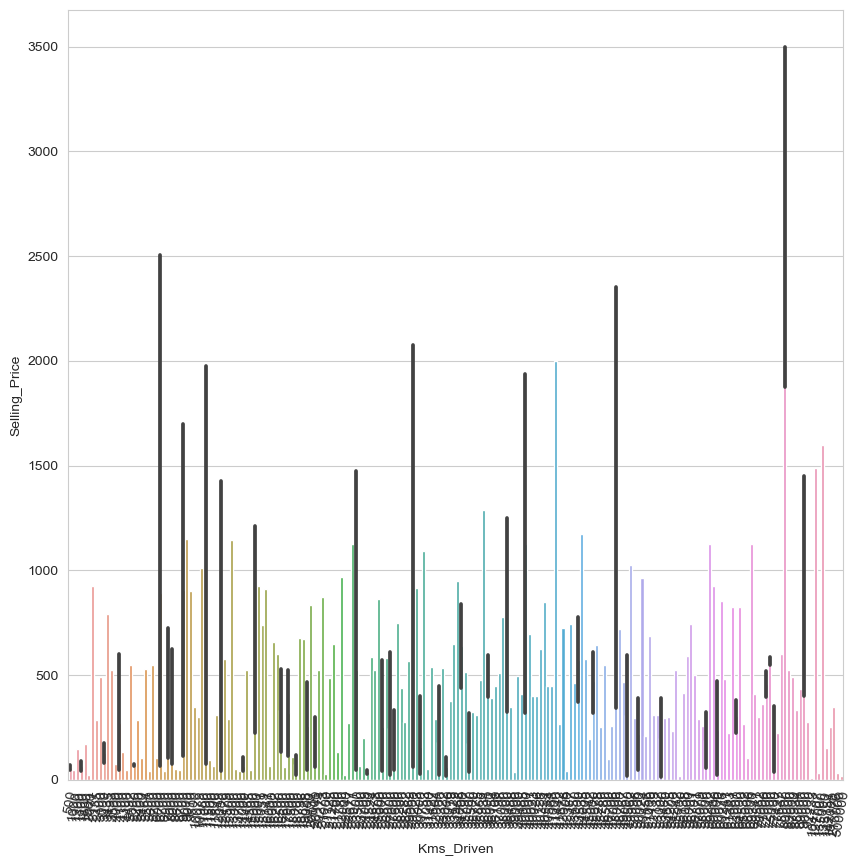

In [63]:
plt.figure(figsize = (10,10))
plot = sns.barplot(y='Selling_Price', x='Kms_Driven', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

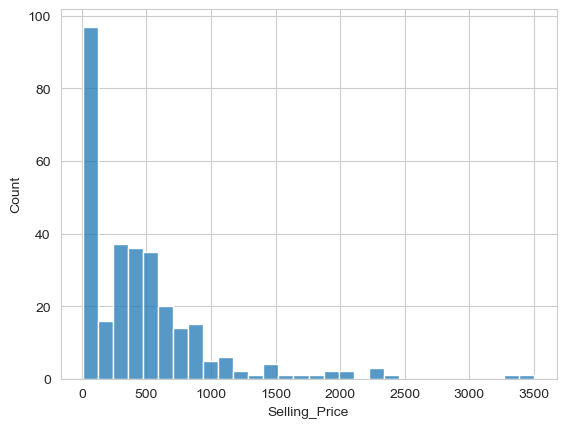

In [64]:
sns.set_style('whitegrid')
sns.histplot(data= df, x='Selling_Price', bins=30)

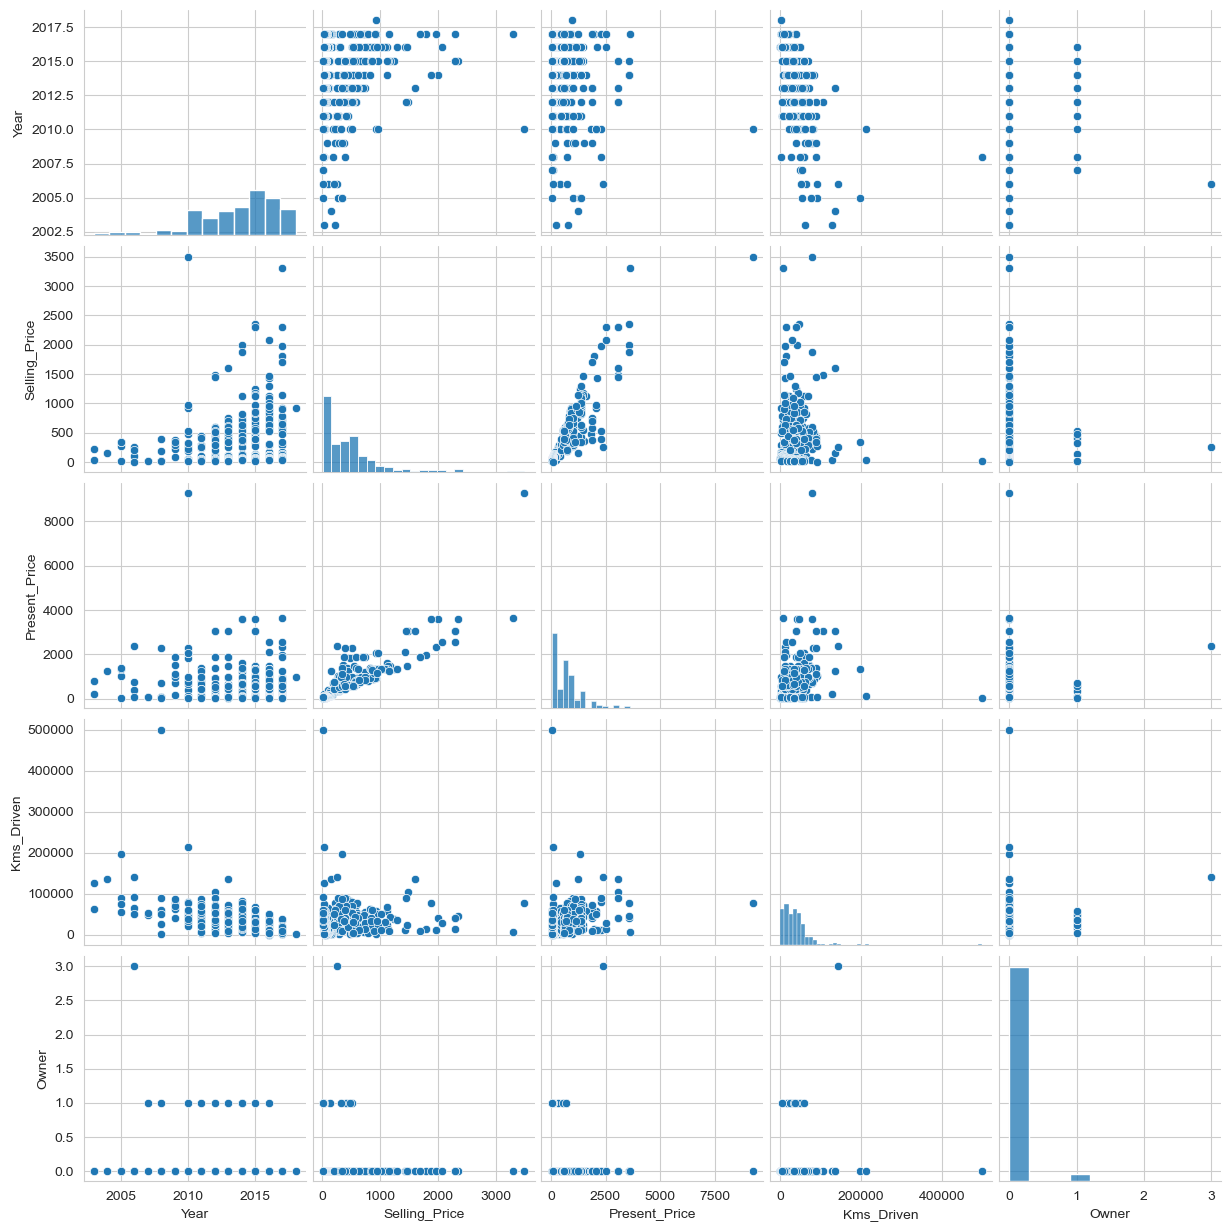

In [65]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with # of seats**

<AxesSubplot:>

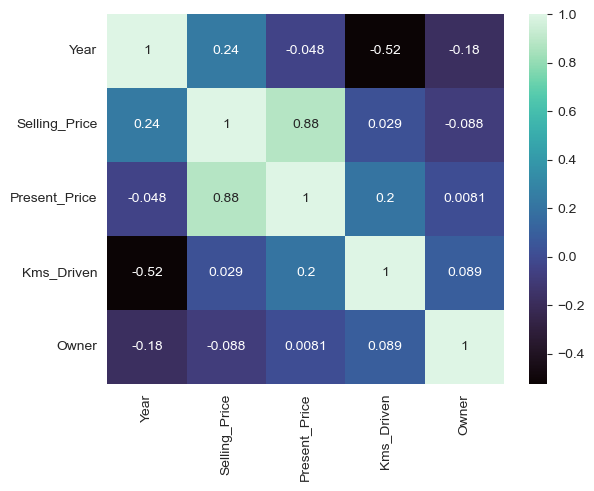

In [66]:
sns.heatmap(df.corr(), annot=True, cmap='mako')

**linear model plot (using seaborn's lmplot) for  selling_price vs. Present_Price.**

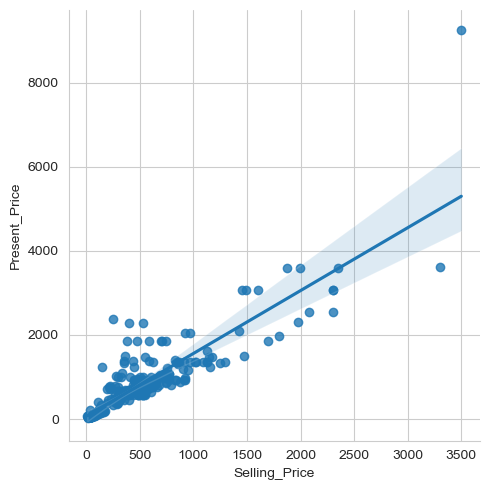

In [67]:
sns.set_style('whitegrid')

sns.lmplot(data=df, x='Selling_Price', y='Present_Price')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Selling_price" column.**

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
X = df[['Kms_Driven','Present_Price' , 'Year']]
y = df['Selling_Price']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.75 and random_state=42**

In [69]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42) # you can do random_set() so you can get the same set

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 3)
(91, 3)
(210,)
(91,)


## Training the Model

Now its time to train our model on our training data!



In [84]:
from sklearn.linear_model import LinearRegression 

**Create an instance of a LinearRegression() model named lm.**

In [85]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [86]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [87]:
coeff_df = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Kms_Driven,0.000065
Present_Price,0.496763
Year,46.034718


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [88]:
predict = lm.predict(X_test)

**a scatterplot of the real test values versus the predicted values. **

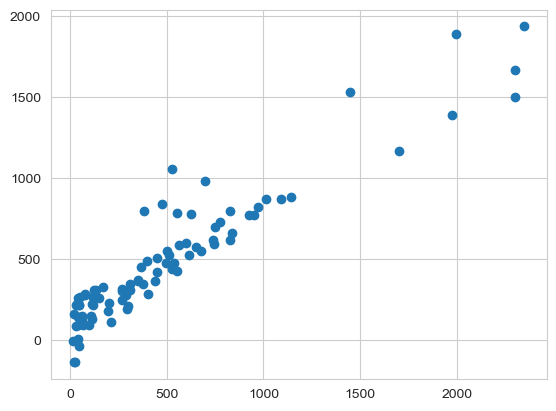

In [89]:
plt.scatter(y_test, predict)

In [90]:
from sklearn.metrics import r2_score

# Checking the results

In [91]:
r2_score(y_test, predict) # the accuracy is 85% with test size of 30%

0.857055083909824

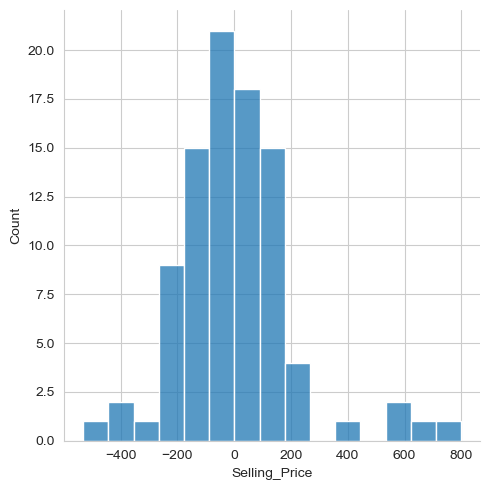

In [128]:
sns.displot((y_test- predict))

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**


In [93]:
from sklearn import metrics

In [94]:
print("MAE ", metrics.mean_absolute_error(y_test, predict))
print("MSE ", metrics.mean_squared_error(y_test, predict))
print("RMSE ", np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE  139.95592341863116
MSE  40702.42212591501
RMSE  201.74841294522


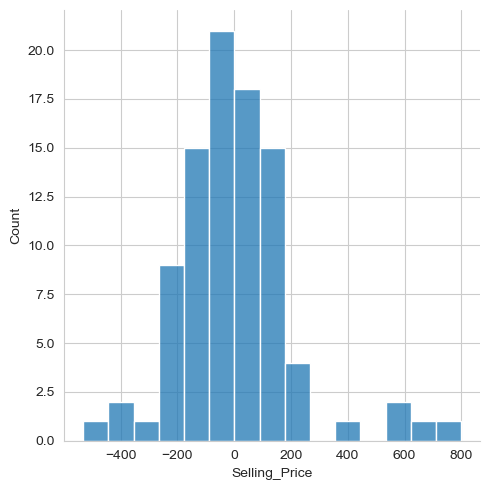

In [95]:
sns.displot((y_test- predict))